In [1]:
## 1) Data Preprocessing Section

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the datasets
X_train = pd.read_csv("weatherAUS_X_train.csv")
y_train = pd.read_csv("weatherAUS_y_train.csv")
X_test = pd.read_csv("weatherAUS_X_test.csv")
y_test = pd.read_csv("weatherAUS_y_test.csv")


# Displaying summary of the datasets
print("Summary of X_train statistics:")
print(X_train.describe())
print("\nSummary of y_train statistics:")
print(y_train.describe())

# Define categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

# Creating pipelines to preprocess the numerical and categorical data
numerical_pipeline = Pipeline([
    # Imputing missing values by replacing with median
    ('imputer', SimpleImputer(strategy='median')),  
    # Standardizing numerical features
    ('scaler', StandardScaler())  
])

categorical_pipeline = Pipeline([
    # Imputing the missing values by replacing with most frequent value
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    # One-hot encoding categorical features
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

# Combinining the pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

# Applying the preprocessing to the X data sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Converting to arrays
X_train_np = np.array(X_train_preprocessed)
X_test_np = np.array(X_test_preprocessed)

# Getting column names
preprocessed_numerical_cols = preprocessor.transformers_[0][2]
preprocessed_categorical_cols = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(input_features=categorical_cols)

# Converting preprocessed data to dataframes
X_train_df = pd.DataFrame(X_train_preprocessed)
X_test_df = pd.DataFrame(X_test_preprocessed)

# Dropping rows that have NaN values
y_train_filtered = y_train.dropna()
y_test_filtered = y_test.dropna()

# Getting the indices of non-NaN values in y_train and y_test
train_indices = y_train_filtered.index
test_indices = y_test_filtered.index

# Filtering the data based on non-NaN values
X_train_filtered = X_train_preprocessed[train_indices]
X_test_filtered = X_test_preprocessed[test_indices]

# Converting sparse data to dense data -- required later as certain models only worked with dense data
X_train_dense = X_train_filtered.toarray()
X_test_dense = X_test_filtered.toarray()

Summary of X_train statistics:
            MinTemp        MaxTemp       Rainfall   Evaporation      Sunshine  \
count  115190.00000  115370.000000  113764.000000  66039.000000  60426.000000   
mean       12.19708      23.219542       2.378870      5.465219      7.612980   
std         6.39974       7.117535       8.537384      4.195541      3.785258   
min        -8.50000      -4.800000       0.000000      0.000000      0.000000   
25%         7.60000      17.900000       0.000000      2.600000      4.800000   
50%        12.00000      22.600000       0.000000      4.800000      8.400000   
75%        16.90000      28.200000       0.800000      7.400000     10.600000   
max        31.90000      47.300000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  108166.000000  114960.000000  113911.000000  114251.000000   
mean       40.036056      14.052157      18.663492      68.908062   
std        13.631077       8.918

In [10]:
## Model Design and Training:

Training and evaluating Decision Tree...


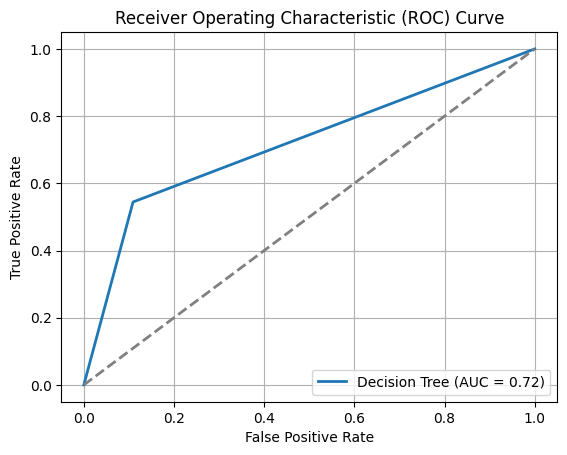

Confusion Matrix for Decision Tree:
[[19609  2403]
 [ 2925  3495]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.87      0.89      0.88     22012
         Yes       0.59      0.54      0.57      6420

    accuracy                           0.81     28432
   macro avg       0.73      0.72      0.72     28432
weighted avg       0.81      0.81      0.81     28432

Accuracy: 0.8126
Precision: 0.5926
Recall: 0.5444
F1-score: 0.5675
AUC-ROC: 0.7176
Training and evaluating MLP...


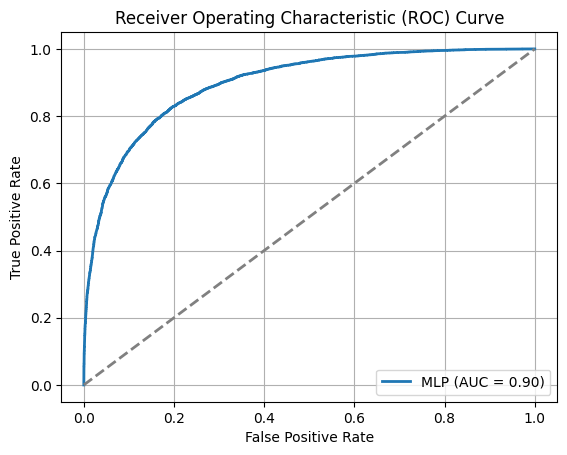

Confusion Matrix for MLP:
[[19771  2241]
 [ 1910  4510]]
Classification Report for MLP:
              precision    recall  f1-score   support

          No       0.91      0.90      0.90     22012
         Yes       0.67      0.70      0.68      6420

    accuracy                           0.85     28432
   macro avg       0.79      0.80      0.79     28432
weighted avg       0.86      0.85      0.86     28432

Accuracy: 0.8540
Precision: 0.6680
Recall: 0.7025
F1-score: 0.6848
AUC-ROC: 0.8975
Training and evaluating Random Forest...


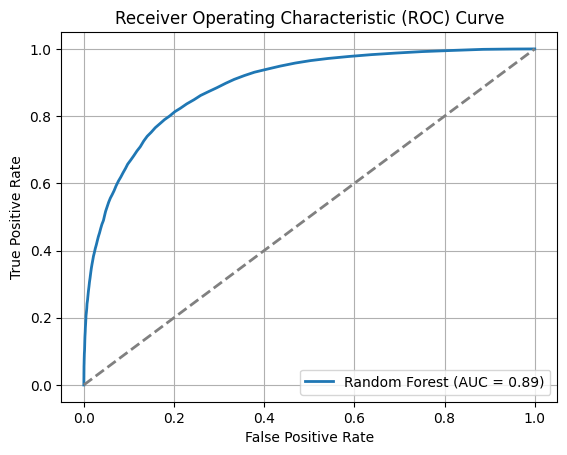

Confusion Matrix for Random Forest:
[[21246   766]
 [ 3516  2904]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       0.86      0.97      0.91     22012
         Yes       0.79      0.45      0.58      6420

    accuracy                           0.85     28432
   macro avg       0.82      0.71      0.74     28432
weighted avg       0.84      0.85      0.83     28432

Accuracy: 0.8494
Precision: 0.7913
Recall: 0.4523
F1-score: 0.5756
AUC-ROC: 0.8898
Training and evaluating Naïve Bayes...


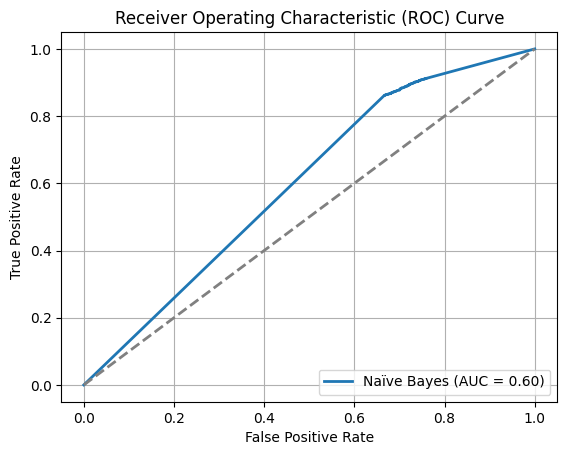

Confusion Matrix for Naïve Bayes:
[[ 7265 14747]
 [  875  5545]]
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

          No       0.89      0.33      0.48     22012
         Yes       0.27      0.86      0.42      6420

    accuracy                           0.45     28432
   macro avg       0.58      0.60      0.45     28432
weighted avg       0.75      0.45      0.47     28432

Accuracy: 0.4505
Precision: 0.2733
Recall: 0.8637
F1-score: 0.4152
AUC-ROC: 0.5998
Training and evaluating Logistic Regression...


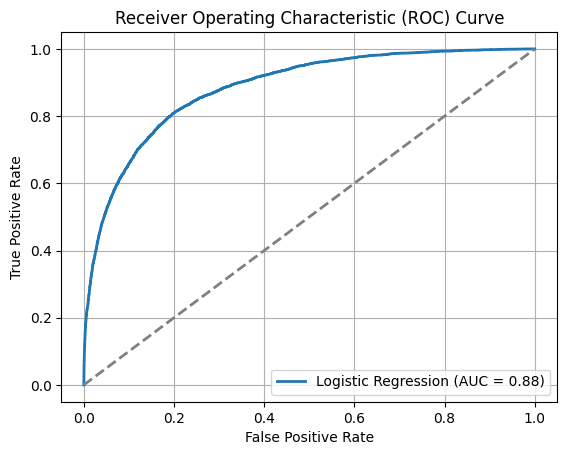

Confusion Matrix for Logistic Regression:
[[20740  1272]
 [ 2908  3512]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.88      0.94      0.91     22012
         Yes       0.73      0.55      0.63      6420

    accuracy                           0.85     28432
   macro avg       0.81      0.74      0.77     28432
weighted avg       0.84      0.85      0.84     28432

Accuracy: 0.8530
Precision: 0.7341
Recall: 0.5470
F1-score: 0.6269
AUC-ROC: 0.8841
Training and evaluating Linear SVM...


C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-pa

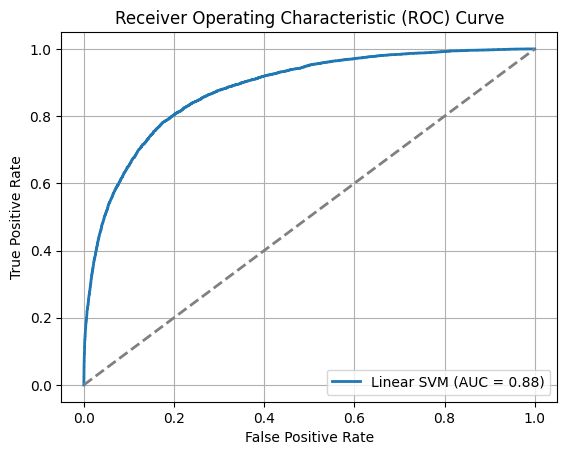

Confusion Matrix for Linear SVM:
[[20724  1288]
 [ 2909  3511]]
Classification Report for Linear SVM:
              precision    recall  f1-score   support

          No       0.88      0.94      0.91     22012
         Yes       0.73      0.55      0.63      6420

    accuracy                           0.85     28432
   macro avg       0.80      0.74      0.77     28432
weighted avg       0.84      0.85      0.84     28432

Accuracy: 0.8524
Precision: 0.7316
Recall: 0.5469
F1-score: 0.6259
AUC-ROC: 0.8815
Training and evaluating Bagging...


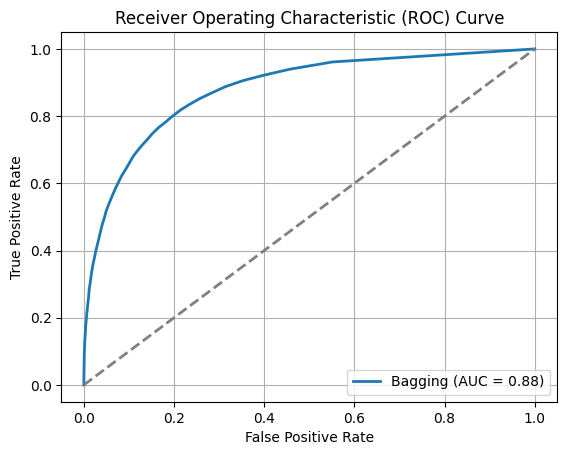

Confusion Matrix for Bagging:
[[20919  1093]
 [ 3095  3325]]
Classification Report for Bagging:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22012
         Yes       0.75      0.52      0.61      6420

    accuracy                           0.85     28432
   macro avg       0.81      0.73      0.76     28432
weighted avg       0.84      0.85      0.84     28432

Accuracy: 0.8527
Precision: 0.7526
Recall: 0.5179
F1-score: 0.6136
AUC-ROC: 0.8794


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV

# Defining the models and classifiers to work with
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naïve Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Linear SVM': LinearSVC(max_iter=5000),
    "Bagging": BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
}


# Loop to train and evaluate the models/classifiers
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Only worked correctly with dense data, not sparse
    if isinstance(model, (LinearSVC, LogisticRegression, GaussianNB)):
        # Fitting the model and forming the predicted value
        model.fit(X_train_dense, y_train_filtered.values.ravel())
        y_pred = model.predict(X_test_dense)
    else:
        # Fitting the model and forming the predicted value
        model.fit(X_train_filtered, y_train_filtered.values.ravel())  # Ensure y_train is a 1D array
        y_pred = model.predict(X_test_filtered)
    
    # Evaluate performance
    conf_matrix = confusion_matrix(y_test_filtered, y_pred)
    class_report = classification_report(y_test_filtered, y_pred)
    accuracy = accuracy_score(y_test_filtered, y_pred)
    precision = precision_score(y_test_filtered, y_pred, pos_label='Yes', average='binary')
    recall = recall_score(y_test_filtered, y_pred, pos_label='Yes', average='binary')
    f1 = f1_score(y_test_filtered, y_pred, pos_label='Yes', average='binary')

    # These models needed sparse data to work, that is what X_test_dense is for
    if isinstance(model, (LogisticRegression, GaussianNB, LinearSVC)):
        if isinstance(model, (GaussianNB, LogisticRegression)):
            prob_pos_class = model.predict_proba(X_test_dense)[:, 1]
        else:
            # For Linear SVC, CalibratedClassifierCV is used to calculate probability
            calibrated_model = CalibratedClassifierCV(model)
            calibrated_model.fit(X_train_filtered, y_train_filtered.values.ravel())
            prob_pos_class = calibrated_model.predict_proba(X_test_filtered)[:, 1]
            
    # Probability for models that work with sparse data        
    else:
        prob_pos_class = model.predict_proba(X_test_filtered)[:, 1]

    # Calculating ROC and the curve
    fpr, tpr, _ = roc_curve(y_test_filtered, prob_pos_class, pos_label='Yes')
    roc_auc = roc_auc_score(y_test_filtered, prob_pos_class)
        
    # Plotting the curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    # Plot dimensions
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


    # Printing evaluation metrics
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)
    print(f"Classification Report for {name}:")
    print(class_report)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
        
    print("="*40)


In [12]:
## Model Optimizing -- using Hyperparameter Tuning -- HalvingGridSearchCV

Training and evaluating Decision Tree with hyperparameter tuning...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 37920
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 37920
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 113760
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Feature Importance:
Feature 1: Importance Score = 0.0084
Feature 2: Importance Score = 0.0043
Feature 3: Importance Score = 0.0494
Feature 4: Importance Score = 0.0048
Feature 5: Importance Score = 0.0530
Feature 6: Importance Score = 0.0932
Feature 7: Importance Score = 0.0067
Feature 8: Importance Score = 0.0049
Feature 9: Importance Score = 0.0107
Feature 10: Importance Score = 0.5846
Feature 11: Importance Score = 0.0073
Feature 12: Importance Score = 0.0701
Feature 13: Importance Score = 0.0010
Feature 14: Importance Score = 0.0100
Feature 1

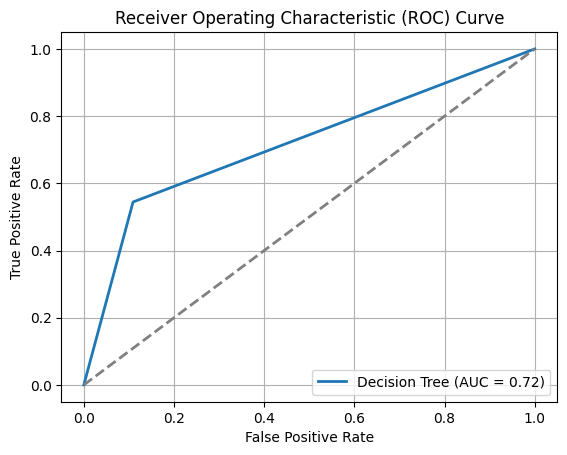

Confusion Matrix for Decision Tree:
[[20625  1387]
 [ 3233  3187]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.86      0.94      0.90     22012
         Yes       0.70      0.50      0.58      6420

    accuracy                           0.84     28432
   macro avg       0.78      0.72      0.74     28432
weighted avg       0.83      0.84      0.83     28432

Accuracy: 0.8375
Precision: 0.6968
Recall: 0.4964
F1-score: 0.5798
AUC-ROC: 0.7176
Training and evaluating MLP with hyperparameter tuning...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 37920
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 37920
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 1
n_candidates: 2
n_resources: 113760
Fitting 5 folds for each of 2 candidates, totalling 10 fits


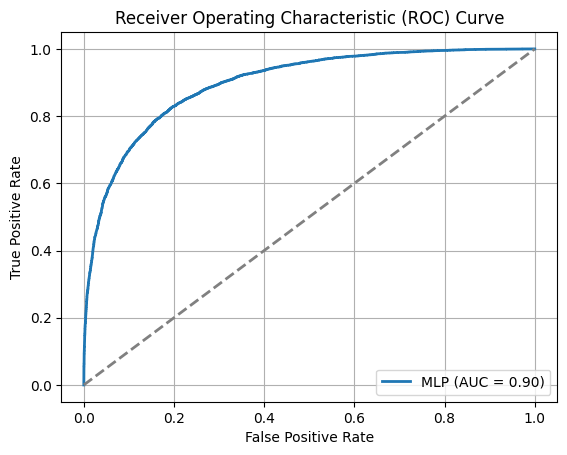

Confusion Matrix for MLP:
[[20246  1766]
 [ 2149  4271]]
Classification Report for MLP:
              precision    recall  f1-score   support

          No       0.90      0.92      0.91     22012
         Yes       0.71      0.67      0.69      6420

    accuracy                           0.86     28432
   macro avg       0.81      0.79      0.80     28432
weighted avg       0.86      0.86      0.86     28432

Accuracy: 0.8623
Precision: 0.7075
Recall: 0.6653
F1-score: 0.6857
AUC-ROC: 0.8975
Training and evaluating Random Forest with hyperparameter tuning...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 37920
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 37920
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 1
n_candidates: 2
n_resources: 113760
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Feature Importance:
Feature 1: Importance Score = 0.03

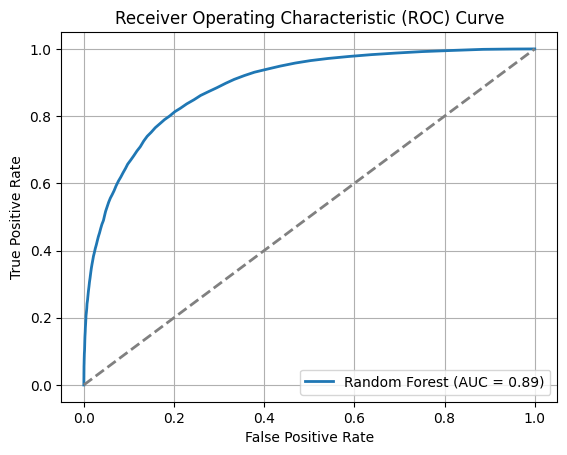

Confusion Matrix for Random Forest:
[[21246   766]
 [ 3491  2929]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       0.86      0.97      0.91     22012
         Yes       0.79      0.46      0.58      6420

    accuracy                           0.85     28432
   macro avg       0.83      0.71      0.74     28432
weighted avg       0.84      0.85      0.83     28432

Accuracy: 0.8503
Precision: 0.7927
Recall: 0.4562
F1-score: 0.5791
AUC-ROC: 0.8898
Training and evaluating Naïve Bayes with hyperparameter tuning...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 37920
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 37920
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


----------
iter: 1
n_candidates: 2
n_resources: 113760
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chees\AppData\

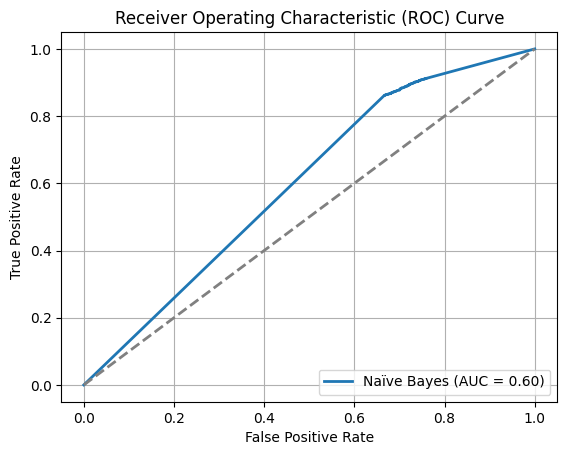

Confusion Matrix for Naïve Bayes:
[[21251   761]
 [ 3490  2930]]
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

          No       0.86      0.97      0.91     22012
         Yes       0.79      0.46      0.58      6420

    accuracy                           0.85     28432
   macro avg       0.83      0.71      0.74     28432
weighted avg       0.84      0.85      0.83     28432

Accuracy: 0.8505
Precision: 0.7938
Recall: 0.4564
F1-score: 0.5796
AUC-ROC: 0.5998
Training and evaluating Logistic Regression with hyperparameter tuning...
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 113761
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2
n_resources: 113761
Fitting 5 folds for each of 2 candidates, totalling 10 fits


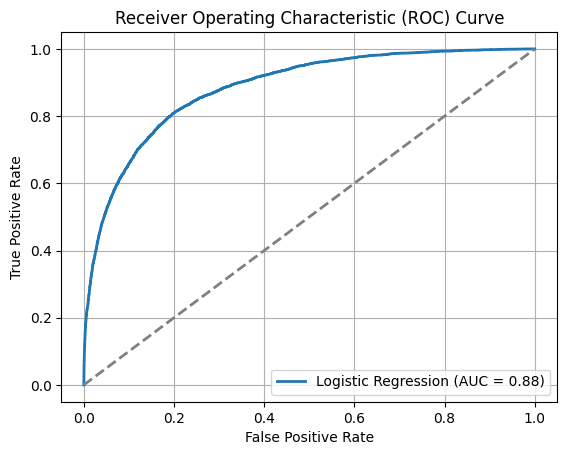

Confusion Matrix for Logistic Regression:
[[20842  1170]
 [ 3083  3337]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22012
         Yes       0.74      0.52      0.61      6420

    accuracy                           0.85     28432
   macro avg       0.81      0.73      0.76     28432
weighted avg       0.84      0.85      0.84     28432

Accuracy: 0.8504
Precision: 0.7404
Recall: 0.5198
F1-score: 0.6108
AUC-ROC: 0.8841
Training and evaluating Linear SVM with hyperparameter tuning...
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 113761
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2
n_resources: 113761
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\chees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\

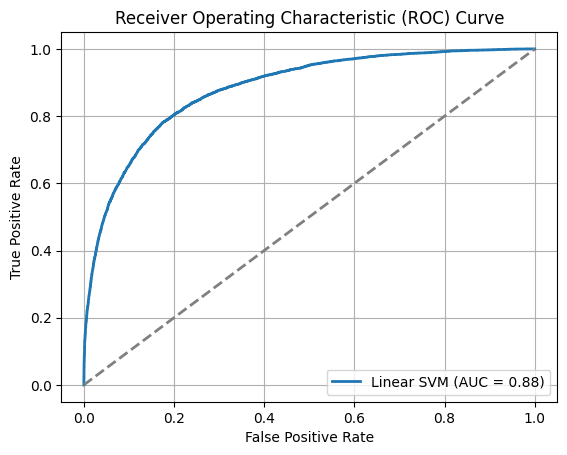

Confusion Matrix for Linear SVM:
[[20805  1207]
 [ 2986  3434]]
Classification Report for Linear SVM:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22012
         Yes       0.74      0.53      0.62      6420

    accuracy                           0.85     28432
   macro avg       0.81      0.74      0.76     28432
weighted avg       0.84      0.85      0.84     28432

Accuracy: 0.8525
Precision: 0.7399
Recall: 0.5349
F1-score: 0.6209
AUC-ROC: 0.8816
Training and evaluating Bagging with hyperparameter tuning...
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 113761
max_resources_: 113761
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2
n_resources: 113761
Fitting 5 folds for each of 2 candidates, totalling 10 fits


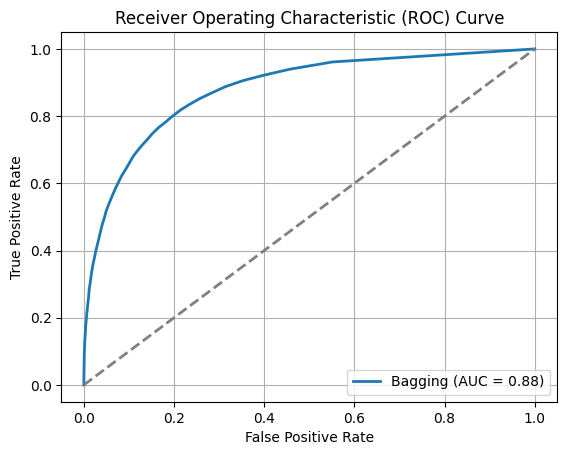

Confusion Matrix for Bagging:
[[20907  1105]
 [ 3108  3312]]
Classification Report for Bagging:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22012
         Yes       0.75      0.52      0.61      6420

    accuracy                           0.85     28432
   macro avg       0.81      0.73      0.76     28432
weighted avg       0.84      0.85      0.84     28432

Accuracy: 0.8518
Precision: 0.7498
Recall: 0.5159
F1-score: 0.6112
AUC-ROC: 0.8794


In [14]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import seaborn as sns
from matplotlib import pyplot


# Defining the hyperparameters for each classifier/model
param_grid = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh']},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'Logistic Regression': {'C': [0.1, 0.01]},
    'Linear SVM': {'C': [0.1, 0.01]},
    'Bagging': {'n_estimators': [50, 100]},
    'Naive Bayes': {'var_smoothing': [1e-9, 1e-8, 1e-7], 'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]}
}
        
# Training and evaluating models with hyperparameter tuning applied
for name, model in models.items():
    print(f"Training and evaluating {name} with hyperparameter tuning...")
    if name in param_grid:
        # Using HalvingGridSearchCV for optimization sake, saves time as otherwise it will run for multiple hours -- with this only ran for a bout 2
        clf = HalvingGridSearchCV(model, param_grid[name], cv=5, verbose=1, n_jobs=-1)
    
    if isinstance(model, (LinearSVC, LogisticRegression, GaussianNB)):
        # Fitting the classifiers/models and calculating the predicted value for dense data models
        clf.fit(X_train_dense, y_train_filtered.values.ravel())
        y_pred = clf.predict(X_test_dense)
    else:
        # Fitting the classifiers/models and calculating the predicted value for sparse data models
        clf.fit(X_train_filtered, y_train_filtered.values.ravel()) 
        y_pred = clf.predict(X_test_filtered)
    
    # Calculating performance metrics
    conf_matrix = confusion_matrix(y_test_filtered, y_pred)
    class_report = classification_report(y_test_filtered, y_pred)
    accuracy = accuracy_score(y_test_filtered, y_pred)
    precision = precision_score(y_test_filtered, y_pred, pos_label='Yes', average='binary')
    recall = recall_score(y_test_filtered, y_pred, pos_label='Yes', average='binary')
    f1 = f1_score(y_test_filtered, y_pred, pos_label='Yes', average='binary')
    
    if isinstance(model, (LogisticRegression, GaussianNB, LinearSVC)):
        # For classifiers/models that use dense data, predict_proba is run here
        if isinstance(model, (GaussianNB, LogisticRegression)):
            prob_pos_class = model.predict_proba(X_test_dense)[:, 1]
        else:
            # For Linear SVC, must use CalibratedClassifierCV
            calibrated_model = CalibratedClassifierCV(model)
            calibrated_model.fit(X_train_filtered, y_train_filtered.values.ravel())
            prob_pos_class = calibrated_model.predict_proba(X_test_filtered)[:, 1]
    else:
        # For sparse data classifiers/models
        prob_pos_class = model.predict_proba(X_test_filtered)[:, 1]

    # Interpretting feature importance for tree-based models
    if name in ['Decision Tree', 'Random Forest']:
        feature_importance = clf.best_estimator_.feature_importances_
    
        # Printing the feature importance scores, excluding scores below 0.0009
        print("Feature Importance:")
        for i, importance in enumerate(feature_importance):
            if importance > 0.0009:  # Check if importance score is not equal to 0.0
                print(f"Feature {i+1}: Importance Score = {importance:.4f}")
    
    # Calculating the ROC-AUC and the curve
    fpr, tpr, _ = roc_curve(y_test_filtered, prob_pos_class, pos_label='Yes')
    roc_auc = roc_auc_score(y_test_filtered, prob_pos_class)
        
    # Plotting ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot dimensions
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    # Printing the performance metrics
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)
    print(f"Classification Report for {name}:")
    print(class_report)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")



    print("="*40)
